In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.rc = {'figure.figsize': (10,6)}
%matplotlib inline

## Pad a 3D mesh

This notebook shows how to pad a 3D mesh. Note that padding a 3D mesh is done on the contour (before tetrahedralization).

In [2]:
from nanomesh import Image
from nanomesh.data import binary_blobs3d

### Generate some data

This cell generates a 3D data set with some feature blobs.

If you want to use your own data, any numpy array can be passed to into a [`Image`](https://nanomesh.readthedocs.io/en/latest/nanomesh.volume.html#nanomesh.volume.Volume) object. Data stored as `.npy` can be loaded using `Image.load()`.

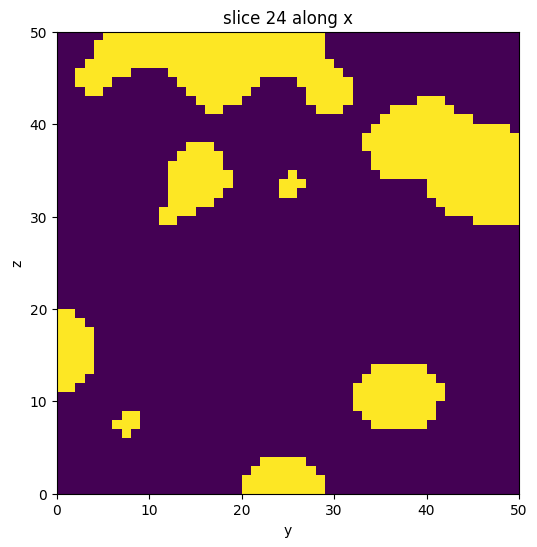

interactive(children=(IntSlider(value=24, description='index', max=49), RadioButtons(description='along', opti…

In [3]:
data = binary_blobs3d(seed=2020)

vol = Image(data)
vol.show_slice()

### Generating the contour

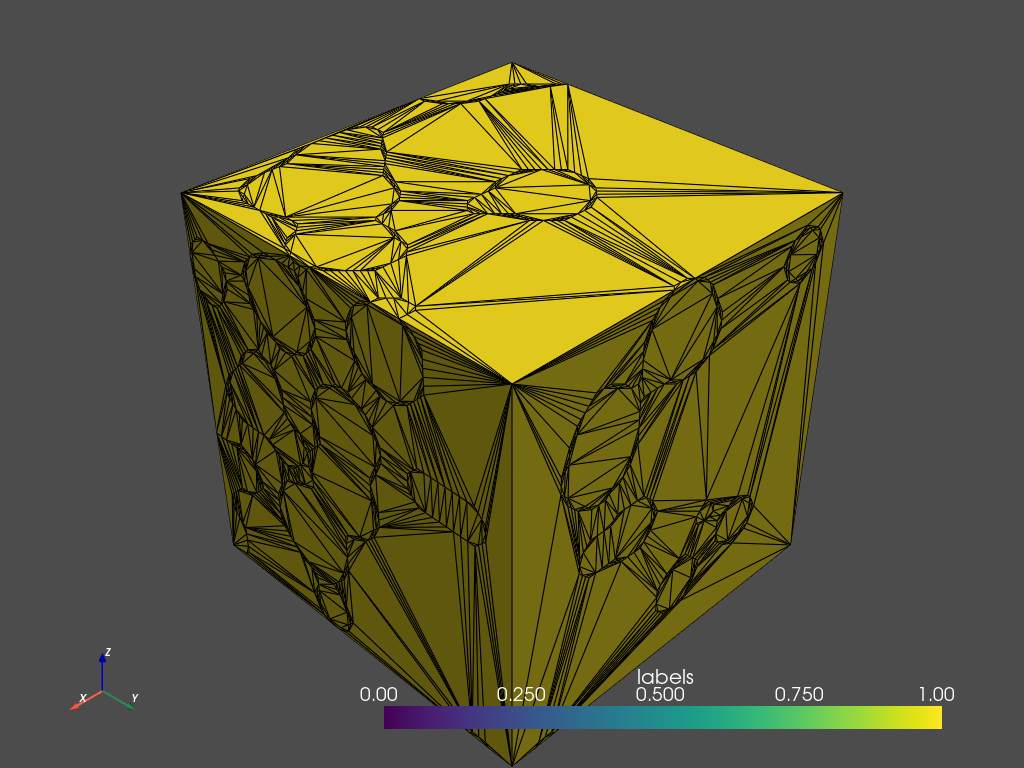

In [4]:
from nanomesh import Mesher

mesher = Mesher(vol)
mesher.generate_contour()
mesher.plot_contour(jupyter_backend='static', show_edges=True)

### Padding different sides

The mesh can be padded using a similar API as 2d meshes. Each side (top/bottom, left/right, front/back) can be padded. A width must be specified.

Regions are labeled with a number. If no label is given, an arbitrary number is assigned. This is used to identify different regions in the mesh.

Note that tetgen will assign a different label for physically separate
regions, even when they are given the same label/name.

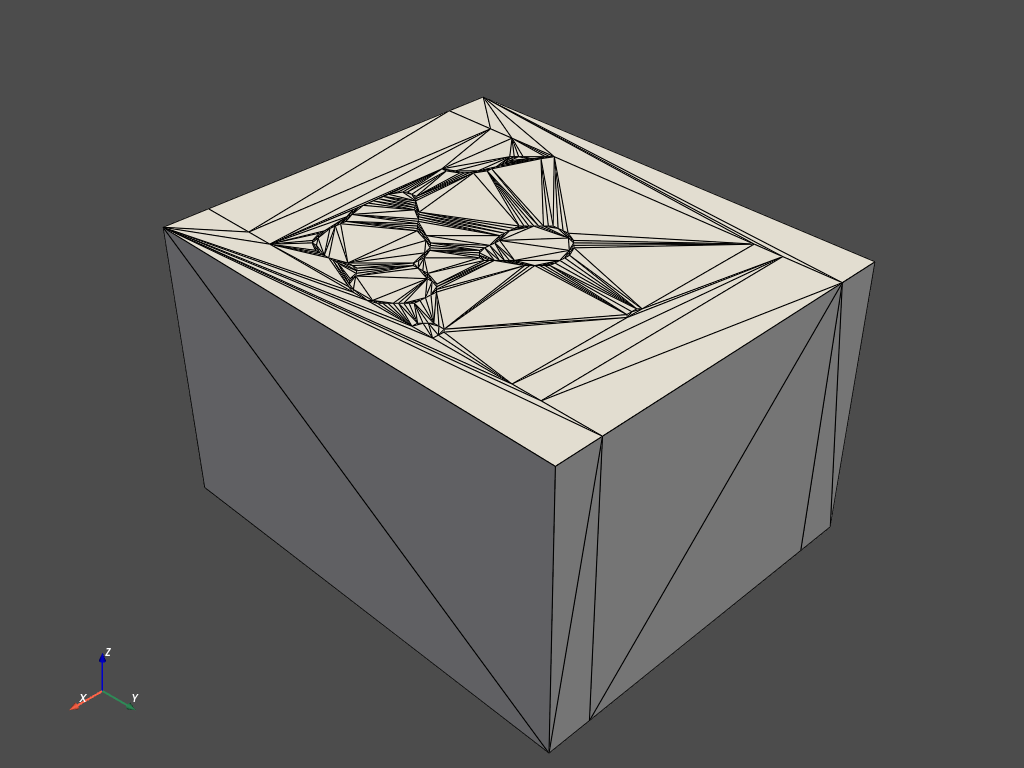

In [5]:
mesher.pad_contour(side='left', width=5, name='inner pad')
mesher.pad_contour(side='left', width=10, name='outer pad')
mesher.pad_contour(side='right', width=5, name='inner pad')
mesher.pad_contour(side='right', width=10, name='outer pad')

mesher.pad_contour(side='front', width=8, name='front pad')
mesher.pad_contour(side='back', width=8, name='back pad')
mesher.plot_contour(jupyter_backend='static', show_edges=True)

### Generate tetrahedral mesh

Finally, generate the tetrahedral mesh. Notice that the inner and outer pads have the same label, because we assigned the same name in `Mesher.pad_contour()`.

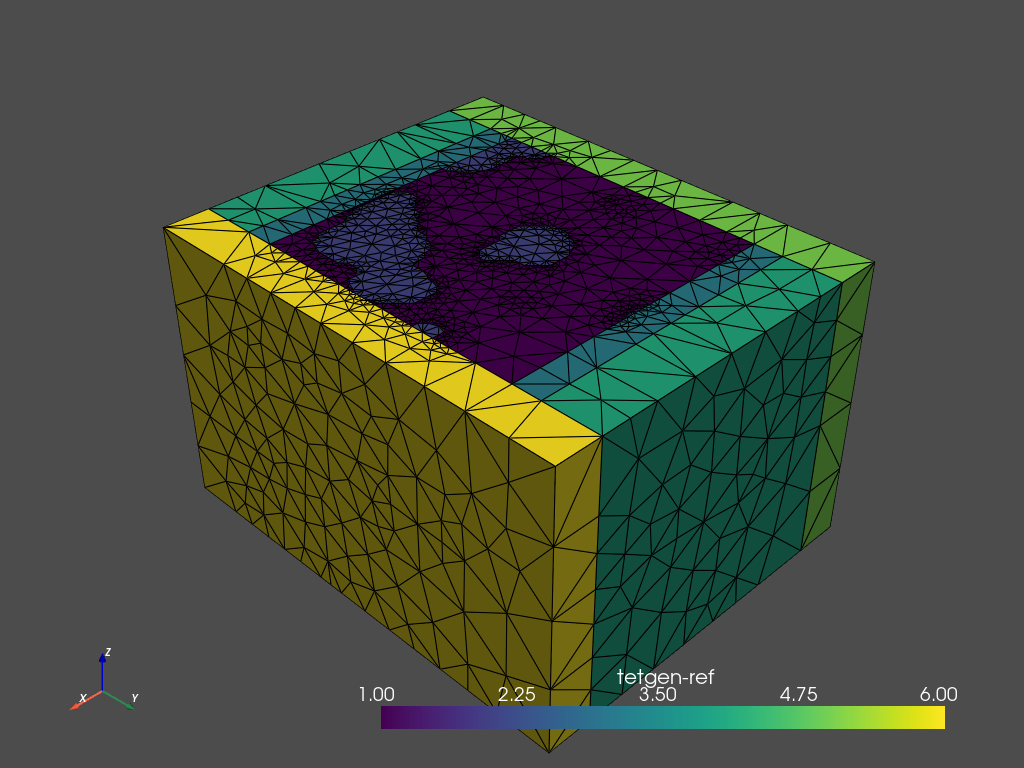

In [6]:
tetras = mesher.tetrahedralize(opts='-pAq -a10000')
tetras.plot_pyvista(jupyter_backend='static', show_edges=True)